In [1]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad import averager_it

import mlgrad.af as af

import numpy as np
import matplotlib.pyplot as plt
# plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True

In [2]:
N = 500
CC = np.array([[0,0],[10,20],[40,10]], 'd')

In [3]:
phi_r1 = 2 * np.pi * np.random.rand(N)
R_r1 = (15 / (1 - 0.7*np.cos(phi_r1+np.pi/3))) * np.random.rand(N)
X1 = R_r1 * np.cos(phi_r1) + CC[0,0]
Y1 = R_r1 * np.sin(phi_r1) + CC[0,1]

In [4]:
phi_r2 = 2 * np.pi * np.random.rand(N)
R_r2 = (15 / (1 - 0.75*np.cos(phi_r2-np.pi/3))) * np.random.rand(N)
X2 = R_r2 * np.cos(phi_r2) + CC[1,0]
Y2 = R_r2 * np.sin(phi_r2) + CC[1,1]

In [5]:
phi_r3 = 2 * np.pi * np.random.rand(N)
R_r3 = (15 / (1 - 0.8*np.cos(phi_r3+np.pi/6))) * np.random.rand(N)
X3 = R_r3 * np.cos(phi_r3) + CC[2,0]
Y3 = R_r3 * np.sin(phi_r3) + CC[2,1]

In [6]:
X = np.hstack((X1,X2,X3))
Y = np.hstack((Y1,Y2,Y3))
XY = np.c_[X,Y]

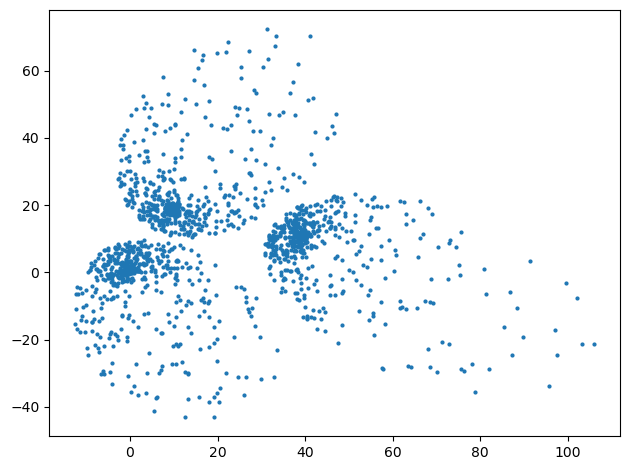

In [7]:
plt.scatter(X, Y, s=4)
plt.show()

In [8]:
# avgmin = avragg.SoftMinimal(0.05)
avgmin = avragg.Minimal()
avrfunc = af.averaging_function("WM", func.QuantileFunc(0.7, func.Sqrt(0.001)))
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, avgmin, 3, 
                                    tol=1.0e-9, n_iter=500, normalize_S=1)

In [9]:
hcd.fit(XY) #, only='locations')

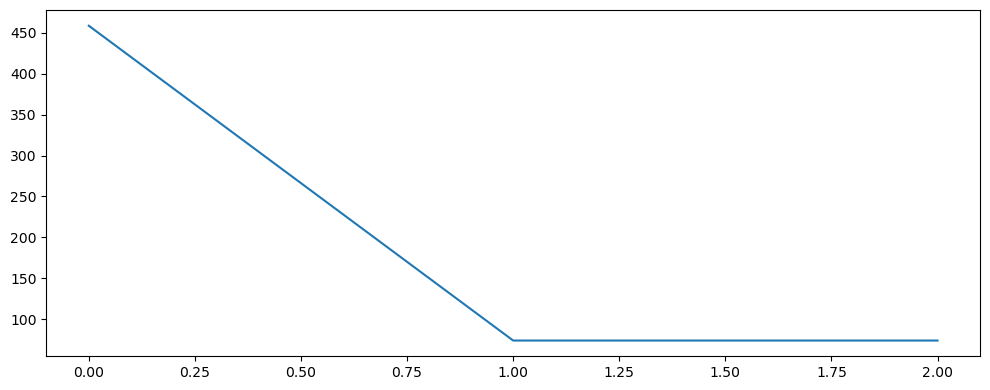

In [10]:
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.plot(hcd.dvals)
# plt.subplot(1,2,2)
plt.plot(hcd.dvals2)
plt.show()

In [11]:
hcd.dvals2

[458.6233900824653, 73.80433649278434, 73.80433649278434]

0.07088196860994062 8837.748087742111


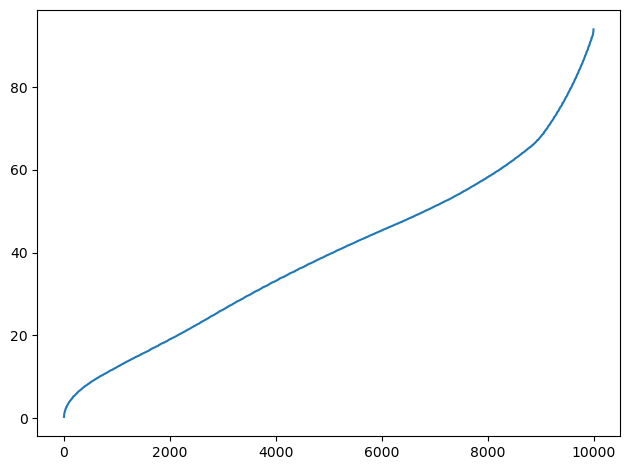

In [12]:
xrange1 = np.linspace(X.min(), X.max(), 100)
xrange2 = np.linspace(Y.min(), Y.max(), 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]

D = hcd.evaluate_dist(XX)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

plt.plot(sorted(np.sqrt(D)))

[[ 0.  0.]
 [10. 20.]
 [40. 10.]]
[[38.56265287 11.4680173 ]
 [-0.90379982  1.2291572 ]
 [ 8.08685247 21.14888595]]


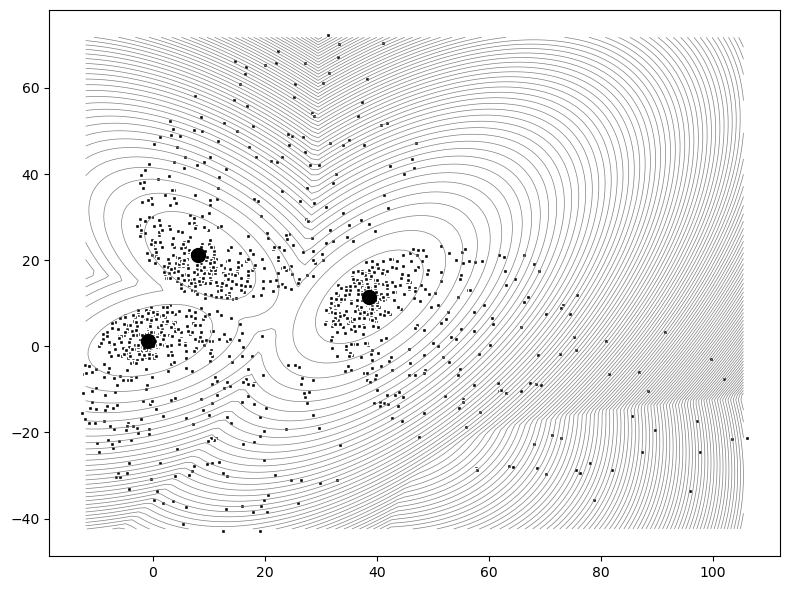

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.contour(DD, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.0,D.max(),100), colors='grey', linewidths=0.5)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=100)
print(CC)
print(hcd.locs.base)
plt.show()

In [14]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, avgmin, 3, 
                                    tol=1.0e-9, n_iter=500, n_iter_s=1, normalize_S=1)

In [15]:
km.fit(XY) #, only='locations')

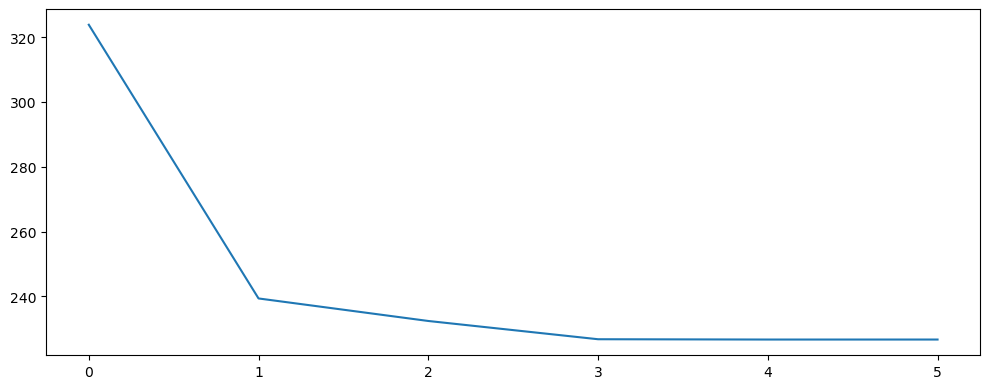

In [16]:
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.plot(km.dvals)
# plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

0.1917923054307716 8354.142207410885


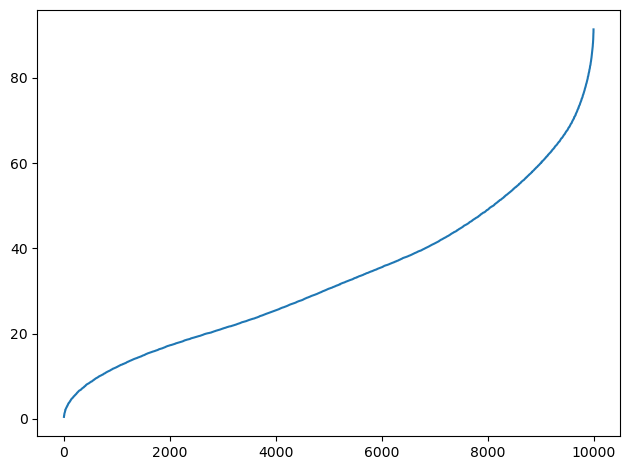

In [17]:
D2 = km.evaluate_dist(XX)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())
plt.plot(sorted(np.sqrt(D2)))

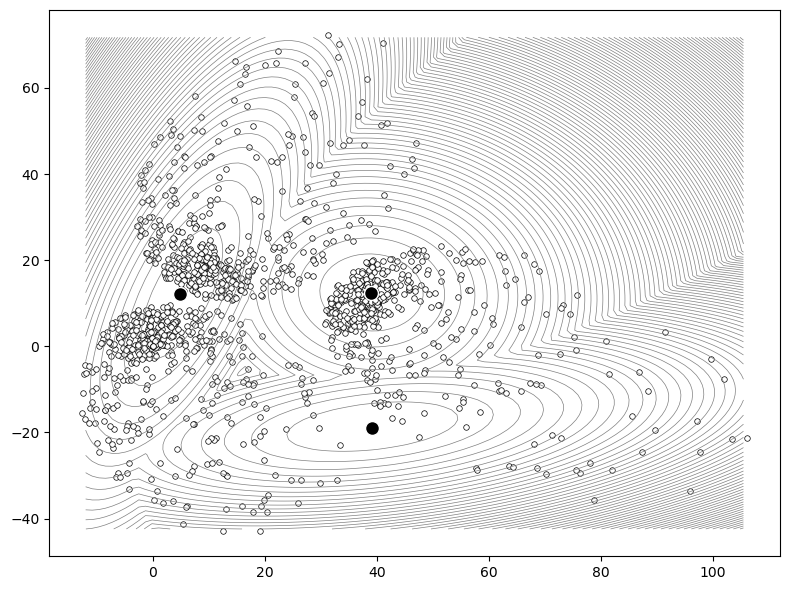

In [23]:
plt.figure(figsize=(8,6))
plt.contour(DD2, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='w', edgecolors='k', marker='o', linewidth=0.5,  s=16)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='w', s=100)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


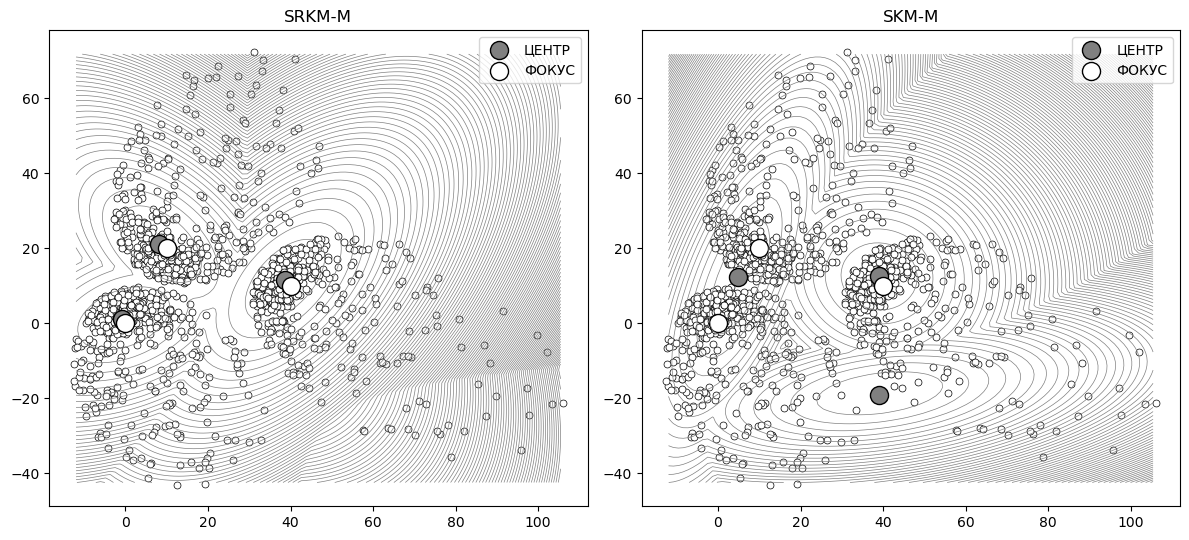

In [24]:
plt.figure(figsize=(12,5.5))

plt.subplot(1,2,1)
# plt.title('Robust algorithm')
plt.title('SRKM-M')
plt.contour(DD, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D.max(),100), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='w', edgecolors='k', marker='o', linewidth=0.5, s=25)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='grey', edgecolors='k', s=169, linewidths=1.0, label='ЦЕНТР')
plt.scatter(CC[:,0], CC[:,1], c='w', edgecolors='k', s=169, linewidths=1.0, label='ФОКУС')
plt.legend()

plt.subplot(1,2,2)
plt.title('SKM-M')
plt.contour(DD2, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='w', edgecolors='k', marker='o', linewidth=0.5, s=25)
plt.scatter(km.locs[:,0], km.locs[:,1], c='grey', edgecolors='k', s=169, linewidths=1.0, label='ЦЕНТР')
plt.scatter(CC[:,0], CC[:,1], c='w', edgecolors='k', s=169, linewidths=1.0, label='ФОКУС')
plt.legend()
plt.savefig('fig/robust_kmeans_center_variance_SZ1.eps')
#plt.tight_layout()
plt.show()

In [20]:
#plt.scatter(D,D2,s=4)